In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [2]:
# data collection & preprocessing
df=pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [3]:
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
#replacing the null value with blank space 
data= df.where((pd.notnull(df)),'')

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [7]:
data.isnull().sum()

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

In [8]:
data.shape 

(5572, 5)

In [9]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, axis=1) # removing unwanted columns

In [11]:
# renaming columns
data.rename(columns={'v1': 'Category', 'v2' :'Message '}, inplace=True)

In [12]:
data.loc[data['Category' ]=='spam', 'category',]=0  #label encoding 
data.loc[data['Category' ]=='ham', 'category',]=1

In [13]:
data.drop('Category', inplace=True, axis=1) #removing extra caregory column

In [14]:
x=data['Message ']    #sroting values in x and y
y=data['category']

In [15]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=20)

In [16]:
print(x.shape)  #shapes of X_train,X_test,Y_train,Y_test
print(y.shape)
print(X_train.shape)
print(X_test.shape)
     

(5572,)
(5572,)
(4457,)
(1115,)


In [17]:
#tranform the test data into feature vectors that can be used as input to the Logistic regression 

feature_extraction=TfidfVectorizer(min_df=1,stop_words='english', lowercase=True) 
feature_extraction
     

TfidfVectorizer(stop_words='english')

In [18]:
X_train_features=feature_extraction.fit_transform(X_train)   #model fiting 
X_test_features=feature_extraction.transform(X_test)

In [19]:
Y_test=Y_test.astype('int')  #changing values of test data from object to integer 
Y_train=Y_train.astype('int')

In [20]:
model=LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

In [21]:
Model_predict= model.predict(X_train_features)
accuracy=accuracy_score(Y_train, Model_predict)
     

In [22]:
print('Accuracy on training data: ', accuracy*100) # accuracy on train data

Accuracy on training data:  96.7915638321741


In [23]:
Model_predict_test= model.predict(X_test_features)
accuracy2=accuracy_score(Y_test, Model_predict_test)
     

In [24]:
print('Accuracy on training data: ', accuracy2*100) # accuracy on test data

Accuracy on training data:  96.05381165919282


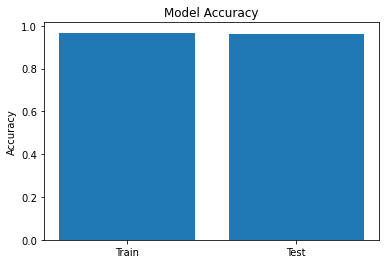

In [25]:
plt.bar(["Train", "Test"], [accuracy, accuracy2])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()
     


In [26]:
input_mail=["It didnt work again oh. Ok goodnight then. I.ll fix and have it ready by the time you wake up. You are very dearly missed have a good night sleep."] 
feature_ext=feature_extraction.transform(input_mail) 
predict_mail= model.predict(feature_ext)
print(predict_mail)

if predict_mail[0]==1:
  print ('ham')
if predict_mail[0]==0:
  print ('spam')
     

[1]
ham
